# FFT Algorithm (Cooley-Tukey algorithm) and visualization

In [6]:
import numpy as np
import matplotlib.pyplot as plt

### Generation of random sinusidol function

In [7]:
# Generate random Input Signal
def randomSignal(t):
  r1 = np.random.randint(10, size=(4))
  r2 = np.random.randint(10, size=(4))

  x = 0
  for i in range(4):
    print(f'{i}. Amplitude: {r1[i]} and Frequency: {r2[i]}')
    x += r1[i] * np.sin(2 * np.pi * r2[i] * t)

  return x

### Recursive FFT Algorithm (Cooley–Tukey algorithm)
[Wikipedia Cooley–Tukey algorithm](https://en.wikipedia.org/wiki/Cooley%E2%80%93Tukey_FFT_algorithm)

In [8]:
def FFT(x):
  N = len(x)

  if N <= 1:
    return x
  else:
    evenX = FFT(x[::2])
    oddX = FFT(x[1::2])
    factor = np.exp(-2j * np.pi * np.arange(N) / N)

    X = np.concatenate([evenX + factor[:N//2] * oddX, evenX + factor[N//2:] * oddX])

    return X

### Basic parameters

In [9]:
# Sampling rate
sr = 128
# Sampling interval
ts = 1.0/sr
# Time array [0, 1]
t = np.arange(0, 1, ts)
# Input Signal randomly generated
x = randomSignal(t)

0. Amplitude: 4 and Frequency: 7
1. Amplitude: 0 and Frequency: 8
2. Amplitude: 7 and Frequency: 0
3. Amplitude: 8 and Frequency: 3


### Plot of input signal

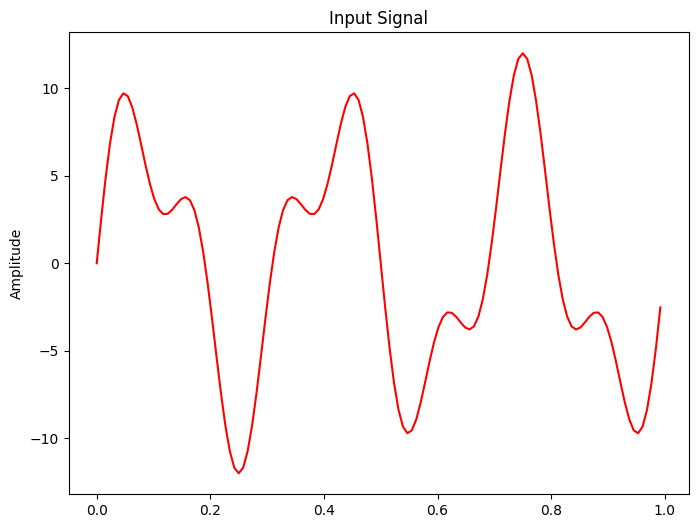

In [10]:
plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.title('Input Signal')
plt.show()

### Application of FFT on input signal and plot

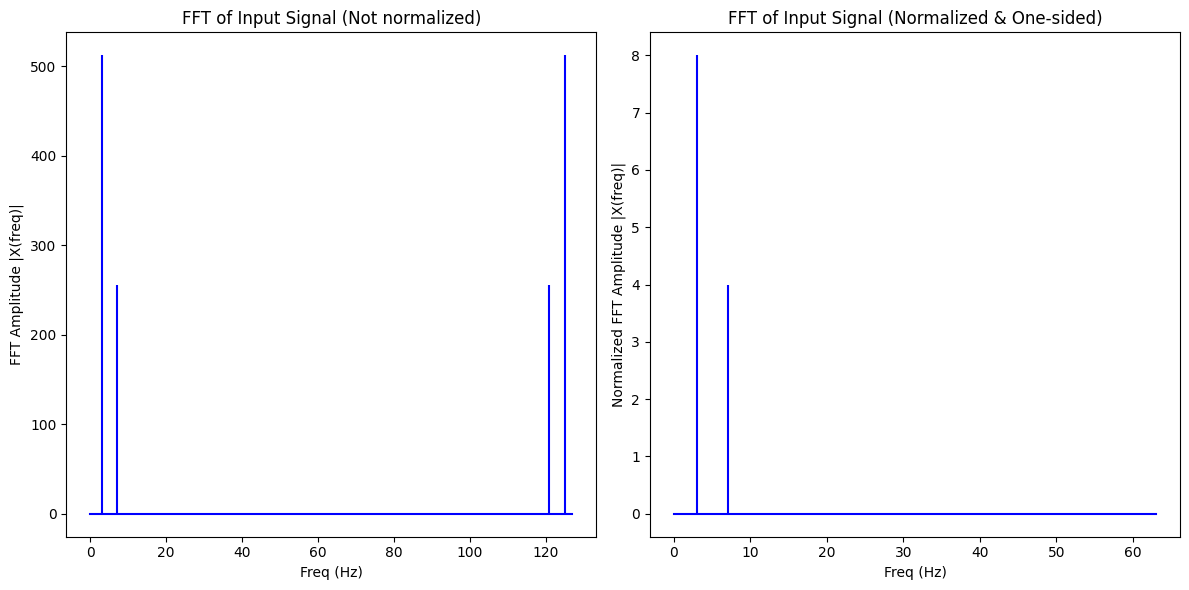

In [11]:
# FFT transforms input signal x
X = FFT(x)

N = len(X)
n = np.arange(N) # Interval [0, N-1]
T = N/sr
freq = n/T

# Non-normalized plot
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.stem(freq, abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.title('FFT of Input Signal (Not normalized)')

# Get the one-sided specturm
n_oneside = N//2
f_oneside = freq[:n_oneside]

# Normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

# Normalized and one-sided plot
plt.subplot(1, 2, 2)
plt.stem(f_oneside, abs(X_oneside), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.title('FFT of Input Signal (Normalized & One-sided)')
plt.tight_layout()
plt.show()